<img src="1.JPG" height=400 width=400 align=center />

- In December 2019, COVID-19 coronavirus was first identified in the Wuhan region of China. By March 11, 2020, the World Health Organization (WHO) categorized the COVID-19 outbreak as a pandemic. A lot has happened in the months in between with major outbreaks in Iran, South Korea, and Italy. We know that COVID-19 spreads through respiratory droplets, such as through coughing, sneezing, or speaking. 

### Problem Statement

- predicting the cumulative number of confirmed cases and fatalities in various locations across the world.

### Dataset basic Information

- Size of dataset:


    - Rows : 25353
        
    - Columns : 6
    
    
- Feature Description:


    -  Id --->
    
    -  Province_State --->
    
    -  Country_Region --->
    
    -  Date --->
    
    -  ConfirmedCases --->
    
    -  Fatalities --->

### Importing Libraries

In [1]:
# Read Data
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# style
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

### Read Data

In [2]:
# Import first 5 rows
train = pd.read_csv("train.csv", sep=",")
train.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  22-01-2020               0           0
1   2            NaN    Afghanistan  23-01-2020               0           0
2   3            NaN    Afghanistan  24-01-2020               0           0
3   4            NaN    Afghanistan  25-01-2020               0           0
4   5            NaN    Afghanistan  26-01-2020               0           0

In [3]:
train.shape  # Rows x Columns

(25353, 6)

In [4]:
train.info()  # Shows Data types, Null Values for each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25353 entries, 0 to 25352
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              25353 non-null  int64 
 1   Province_State  10773 non-null  object
 2   Country_Region  25353 non-null  object
 3   Date            25353 non-null  object
 4   ConfirmedCases  25353 non-null  int64 
 5   Fatalities      25353 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.2+ MB


In [5]:
train.dtypes  # Gives data types of each variable

Id                 int64
Province_State    object
Country_Region    object
Date              object
ConfirmedCases     int64
Fatalities         int64
dtype: object

In [6]:
train.count()  # Gives number of data points in each variable

Id                25353
Province_State    10773
Country_Region    25353
Date              25353
ConfirmedCases    25353
Fatalities        25353
dtype: int64

In [7]:
train[["ConfirmedCases","Fatalities"]] = train[["ConfirmedCases","Fatalities"]].astype(int)

In [12]:
# convert format DD-MM-YYYY to YYYY-MM-DD
import datetime
train['Date'] = pd.to_datetime(train['Date'])
train['Date']

0       2020-01-22
1       2020-01-23
2       2020-01-24
3       2020-01-25
4       2020-01-26
           ...    
25348   2020-07-04
25349   2020-08-04
25350   2020-09-04
25351   2020-10-04
25352   2020-11-04
Name: Date, Length: 25353, dtype: datetime64[ns]

In [11]:
# Shows Starting date and Ending date
print(train['Date'].min())
print(train['Date'].max())

2020-01-02 00:00:00
2020-12-03 00:00:00


#### Summary and count for Numerical & categorical attribute

In [10]:
# Summary and count for Numerical attribute
df1 = train[['ConfirmedCases', 'Fatalities']]
df1.describe()

ConfirmedCases    Fatalities
count    25353.000000  25353.000000
mean      1003.824518     50.392853
std       7542.589521    592.843013
min          0.000000      0.000000
25%          0.000000      0.000000
50%          1.000000      0.000000
75%         93.000000      1.000000
max     181026.000000  19468.000000

In [11]:
# Summary and count for categorical attribute
df2 = train[['Province_State', 'Country_Region']]
df2.describe(include=["O"])

Province_State Country_Region
count           10773          25353
unique            133            184
top             Tibet             US
freq               81           4374

In [12]:
df_Num = train[['ConfirmedCases', 'Fatalities']]

<h2 style="color:blue" align="left"> EDA (Exploratory Data Analysis) </h2>

### Country_Region

In [13]:
train['Country_Region'].nunique()  # Number of uniques values in variable "Country_Region"

184

In [14]:
train['Country_Region'].unique()  # List of uniques categories in variable "Country_Region"

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [15]:
train['Country_Region'].value_counts()  # Number of data points in variable "Country_Region"

US                4374
China             2673
Canada             972
United Kingdom     891
France             891
                  ... 
Ethiopia            81
Taiwan*             81
Benin               81
Morocco             81
Dominica            81
Name: Country_Region, Length: 184, dtype: int64

### ConfirmedCases

In [16]:
train['ConfirmedCases'].nunique()  # Number of uniques values in variable "ConfirmedCases"

2494

In [17]:
train['ConfirmedCases'].unique()  # List of uniques categories in variable "Country_Region"

array([    0,     1,     4, ..., 73758, 78991,   406])

In [18]:
train['ConfirmedCases'].value_counts()  # Number of data points in variable "Country_Region"

0       12475
1        1015
2         445
3         435
4         282
        ...  
1784        1
3849        1
7979        1
3897        1
2031        1
Name: ConfirmedCases, Length: 2494, dtype: int64

### Fatalities

In [19]:
# In Fatalities, listed no of unique categories
train['Fatalities'].nunique()

629

In [20]:
train['Fatalities'].value_counts()  # Number of data points in variable "Country_Region"

0       18566
1        1586
2         810
3         570
6         423
        ...  
617         1
649         1
2808        1
793         1
3174        1
Name: Fatalities, Length: 629, dtype: int64

In [21]:
# Listed Sum of "Canada" Confirmed Cases & Fatalities
train[train['Country_Region']=='Canada'].groupby(by='Country_Region').sum()

Id  ConfirmedCases  Fatalities
Country_Region                                     
Canada          4970808          233554        4282

In [22]:
# Showing data of China
train.loc[train['Country_Region'] == 'China', :].head(10)

Id Province_State Country_Region       Date  ConfirmedCases  \
4374  6157          Anhui          China 2020-01-22               1   
4375  6158          Anhui          China 2020-01-23               9   
4376  6159          Anhui          China 2020-01-24              15   
4377  6160          Anhui          China 2020-01-25              39   
4378  6161          Anhui          China 2020-01-26              60   
4379  6162          Anhui          China 2020-01-27              70   
4380  6163          Anhui          China 2020-01-28             106   
4381  6164          Anhui          China 2020-01-29             152   
4382  6165          Anhui          China 2020-01-30             200   
4383  6166          Anhui          China 2020-01-31             237   

      Fatalities  
4374           0  
4375           0  
4376           0  
4377           0  
4378           0  
4379           0  
4380           0  
4381           0  
4382           0  
4383           0

In [23]:
# Listing first 20 rows of Confirmed cases in US 
Confirmed_US = train[train['Country_Region'] == 'US'].groupby(['Date']).sum().ConfirmedCases.head(20)
Confirmed_US

Date
2020-01-02         0
2020-01-03         0
2020-01-04    213214
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
2020-01-27         0
2020-01-28         0
2020-01-29         0
2020-01-30         0
2020-01-31         0
2020-02-02         0
2020-02-03         0
2020-02-04    243441
2020-02-13         0
2020-02-14         0
2020-02-15         0
2020-02-16         0
Name: ConfirmedCases, dtype: int32

<h3 style="color:green" align="left"> Missing Values </h3>

In [24]:
# Listing Number of missing values by feature column wise.
train.isnull().sum()

Id                    0
Province_State    14580
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

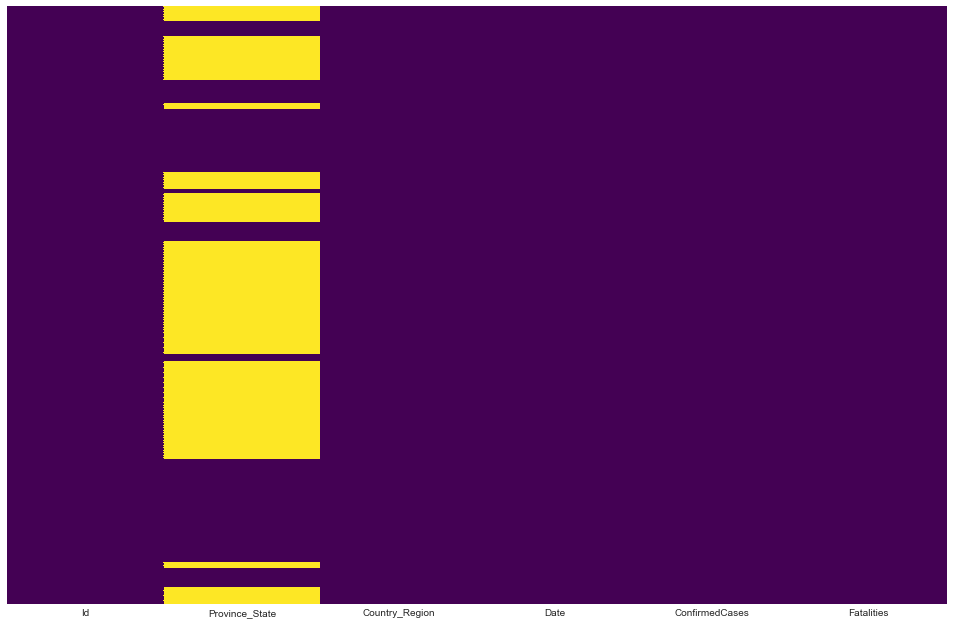

In [25]:
# Missing value representation by Heatmap
plt.figure(figsize=(15,11))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- From graph understood that "Province_State" has missing values

<h2 style="color:green" align="left"> Data Visualization </h2>

- Used below **visualisation libraries**


  1. Matplotlib


  2. Seaborn (statistical data visualization)

### 1. Univariate Analysis

- Univariate Analysis : data consists of **only one variable**.


   1. Bar Charts
   

   2. Histograms
   

   3. Pie Charts

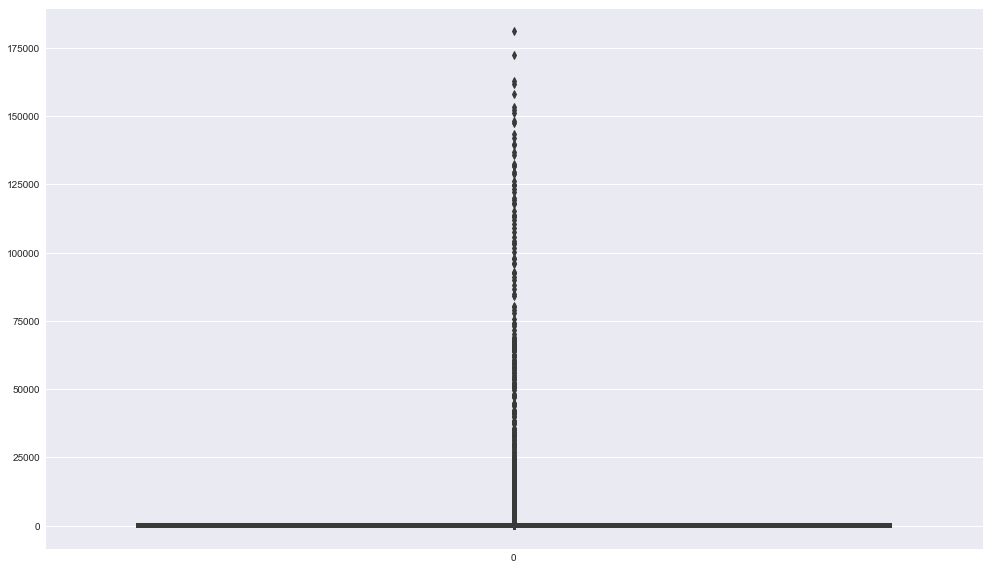

In [26]:
# Box Plot used to find out the outliers in feature column of "ConfirmedCases"
plt.figure(figsize=(15,10))
sns.boxplot(data=train['ConfirmedCases'], palette='winter')

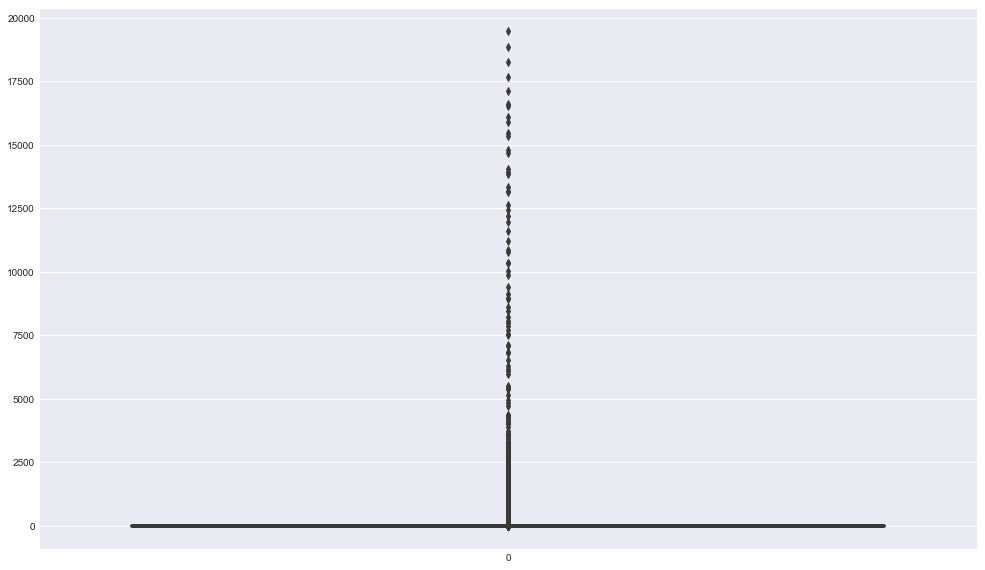

In [27]:
# Box Plot used to find out the outliers in feature column of "Fatalities"
plt.figure(figsize=(15,10))
sns.boxplot(data=train['Fatalities'], palette='winter')

In [1]:
# Bar Chart for showing count of County/Region wise
plt.figure(figsize=(15,11))

train['Country_Region'].value_counts()[0:40].plot(kind='bar')

plt.xlabel('Country_Region', fontsize=17, fontweight = 'bold')
plt.ylabel('Count', fontsize=17, fontweight = 'bold')

plt.title('Country_Region Vs Count', fontsize=20, fontweight = 'bold')

plt.show()

NameError: name 'plt' is not defined

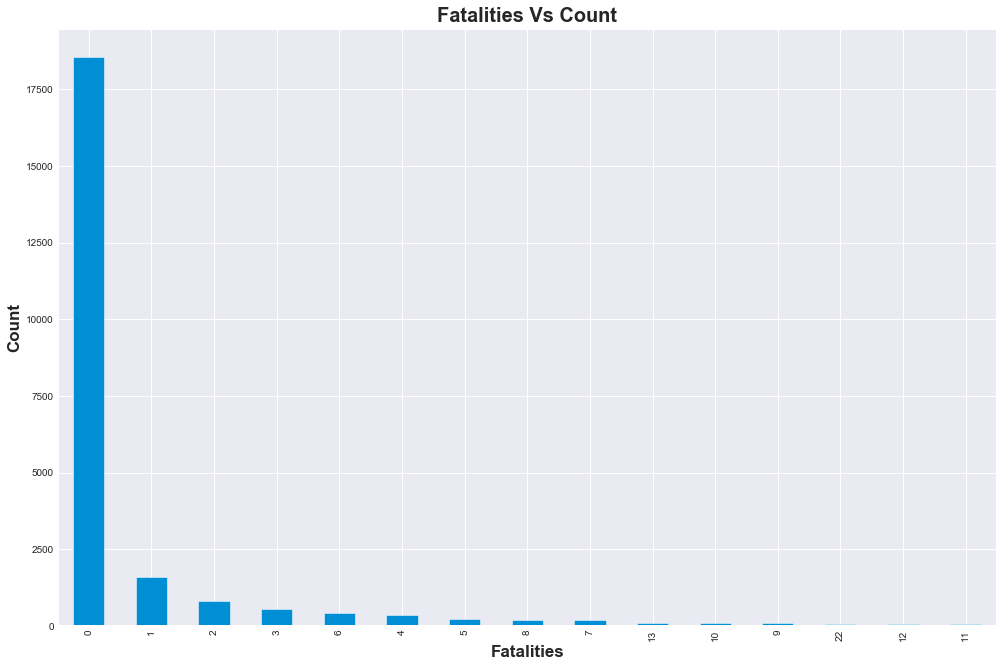

In [29]:
# Bar Chart for showing count of Fatalities
plt.figure(figsize=(15,11))

train['Fatalities'].value_counts()[0:15].plot(kind='bar')

plt.xlabel('Fatalities', fontsize=17, fontweight = 'bold')
plt.ylabel('Count', fontsize=17, fontweight = 'bold')

plt.title('Fatalities Vs Count', fontsize=20, fontweight = 'bold')

plt.show()

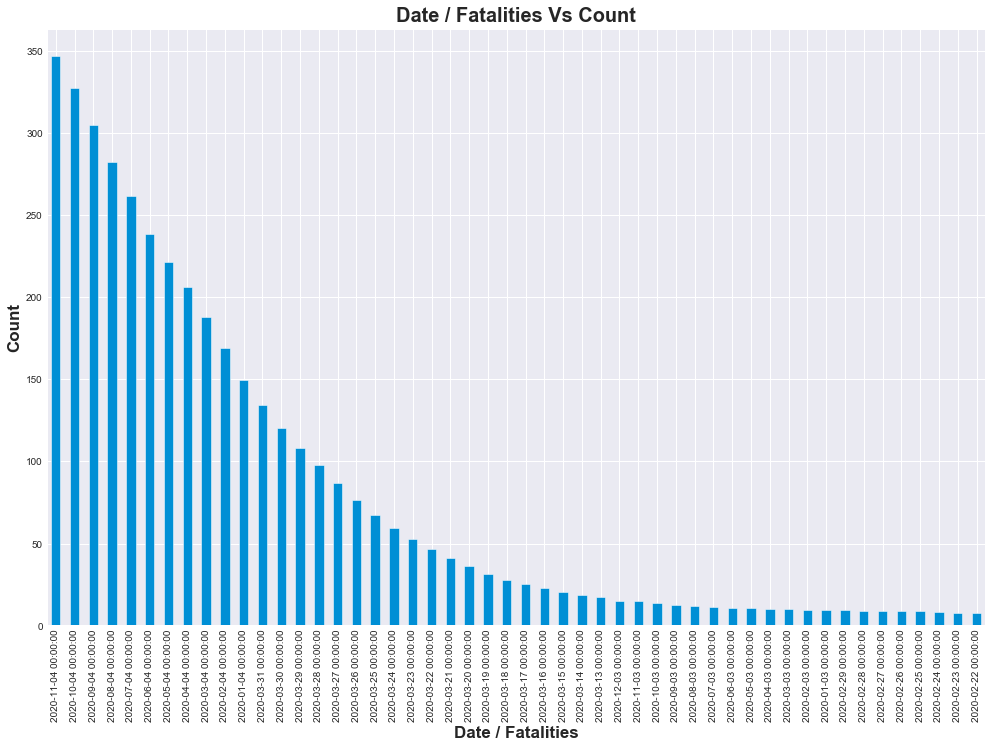

In [30]:
# Bar Chart for showing count of Date wise Fatalities
plt.figure(figsize=(15,11))

train.groupby('Date').mean().sort_values(by='Fatalities', ascending=False)['Fatalities'][0:50].plot(kind='bar')

plt.xlabel('Date / Fatalities', fontsize=17, fontweight = 'bold')
plt.ylabel('Count', fontsize=17, fontweight = 'bold')

plt.title('Date / Fatalities Vs Count', fontsize=20, fontweight = 'bold')

plt.show()

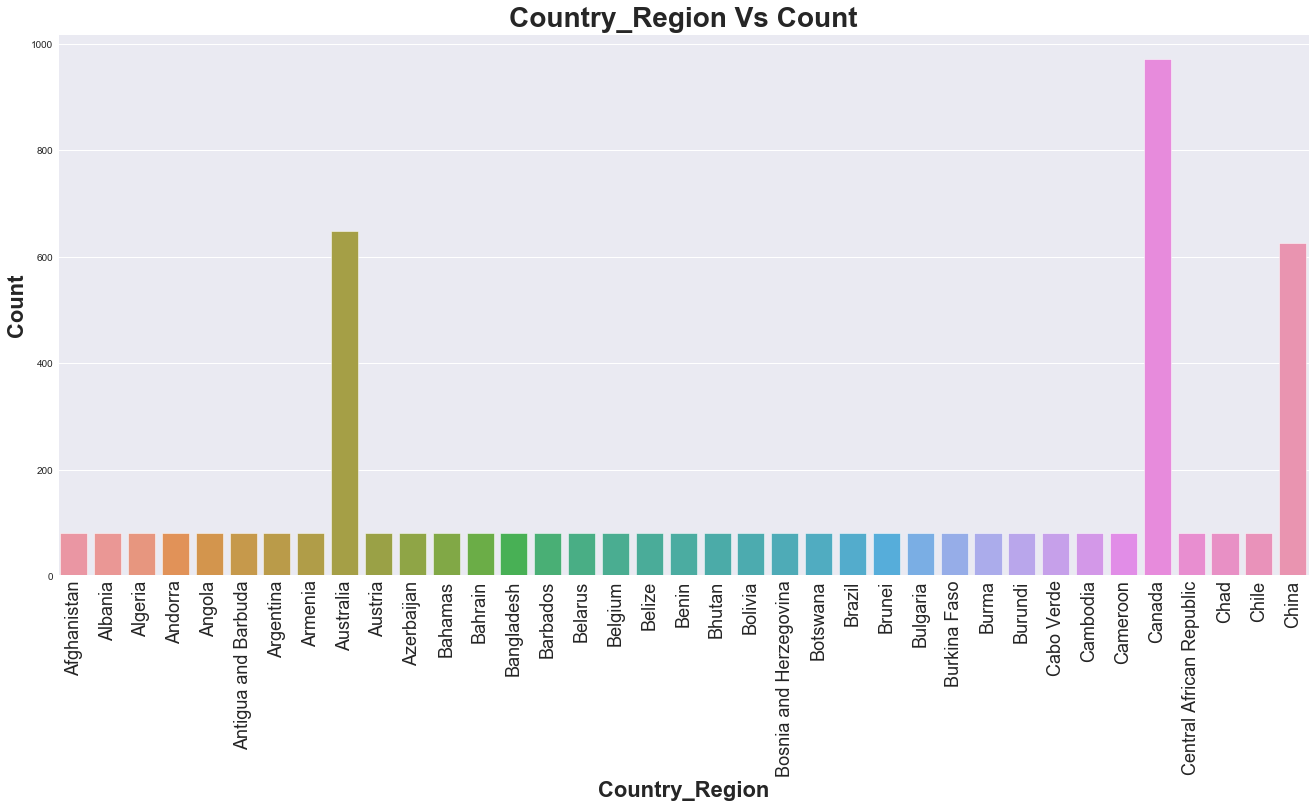

In [31]:
# Count map by using Seaborn
# Showing Count for Each Country from first 5000 rows
plt.figure(figsize=(20,10))
sns.countplot(train['Country_Region'].head(5000))

plt.xlabel('Country_Region', fontsize=22, fontweight = 'bold')
plt.ylabel('Count', fontsize=22, fontweight = 'bold')

plt.title('Country_Region Vs Count', fontsize=28, fontweight = 'bold')

plt.xticks(rotation = 90, fontsize=18)

plt.show()

### 2. Bivariate Analysis

- Bivariate Analysis : data involves **two different variables**.


-  There are three types of bivariate analysis


     1. Numerical & Numerical
     
     2. Categorical & Categorical
     
     3. Numerical & Categorical

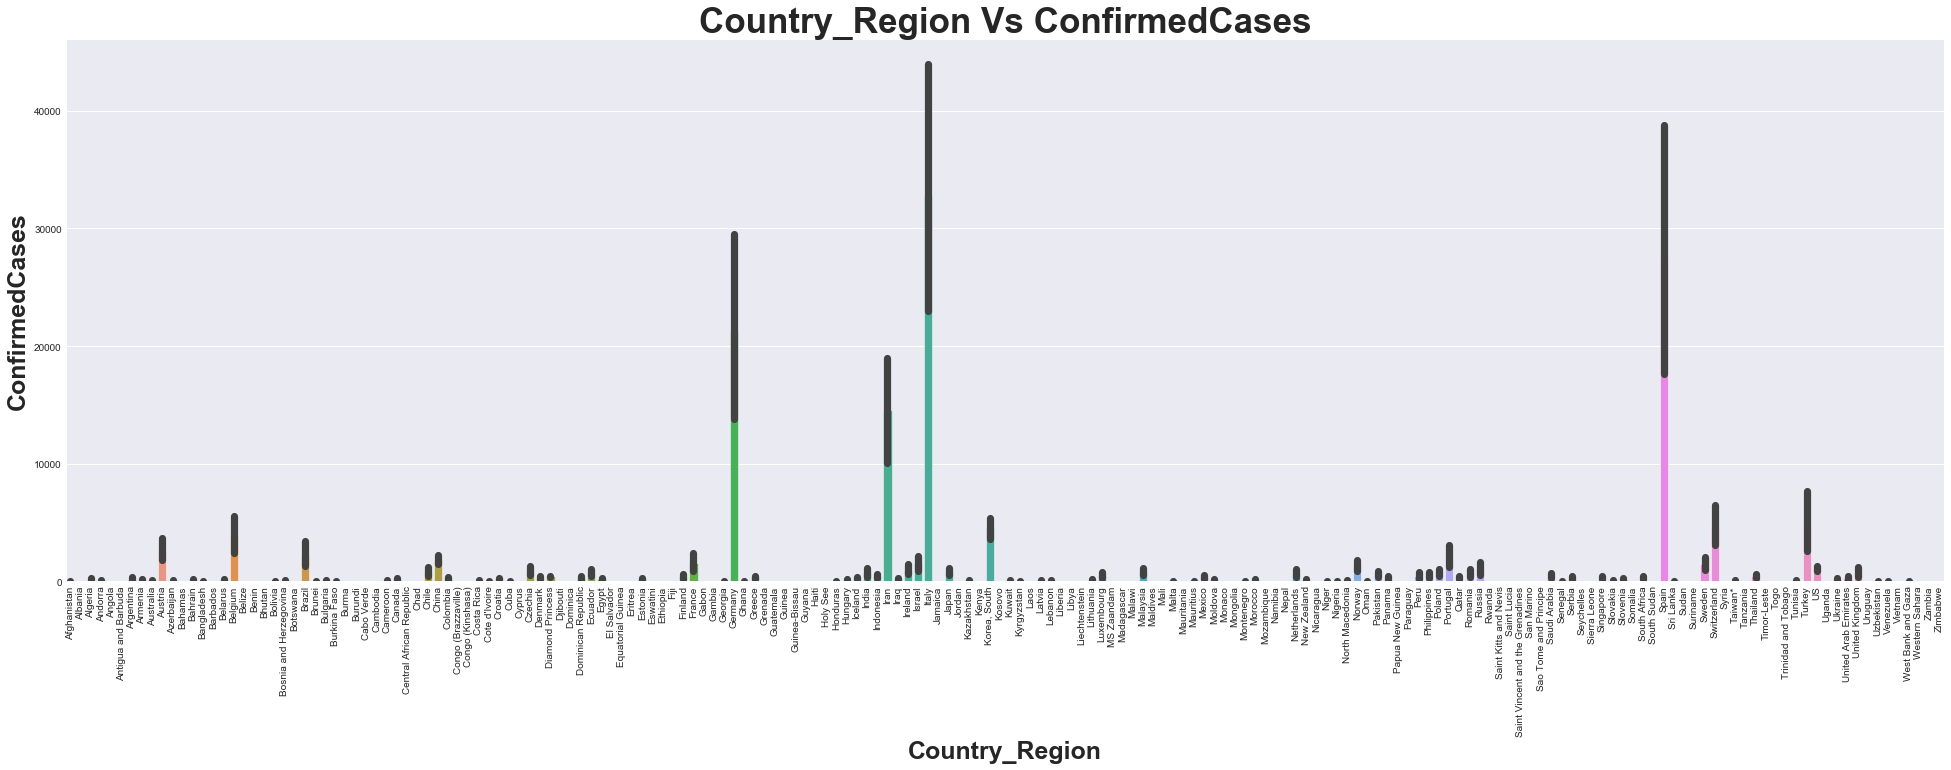

In [32]:
# Bar plot between "Country_Region" & "ConfirmedCases"
plt.figure(figsize=(30,10))
sns.barplot(x='Country_Region', y='ConfirmedCases', data=train)

plt.xlabel('Country_Region', fontsize=25, fontweight='bold')
plt.ylabel('ConfirmedCases', fontsize=25, fontweight='bold')

plt.title('Country_Region Vs ConfirmedCases', fontsize=35, fontweight='bold')

plt.xticks(rotation=90)

plt.show()

- graph shows number of **Confirmed Cases** by **Country** wise and can find which country have max / min cases.

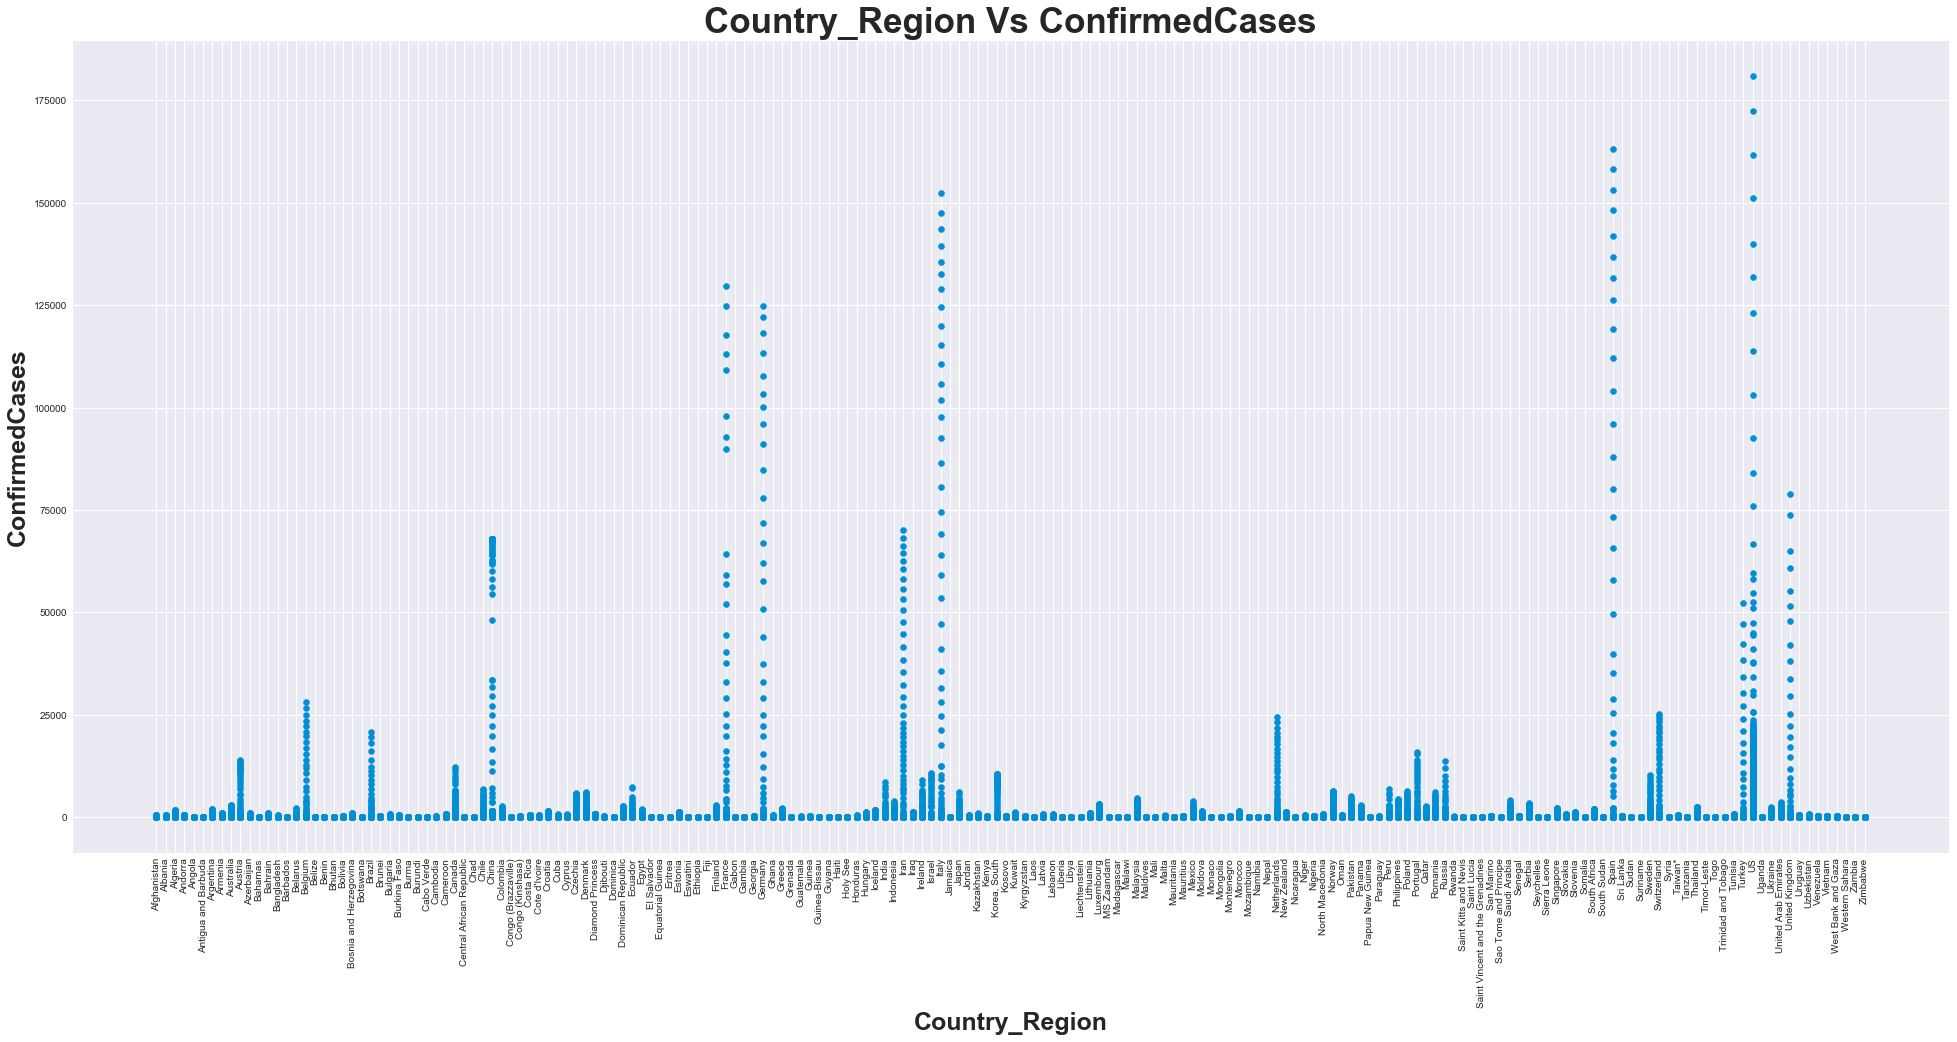

In [35]:
# Scatter plot between "Country_Region" & "ConfirmedCases"
plt.figure(figsize=(30,15))
plt.scatter(train['Country_Region'], train['ConfirmedCases'])

plt.xlabel('Country_Region', fontsize=25, fontweight='bold')
plt.ylabel('ConfirmedCases', fontsize=25, fontweight='bold')

plt.title('Country_Region Vs ConfirmedCases', fontsize=35, fontweight='bold')
plt.xticks(rotation = 90)

plt.show()

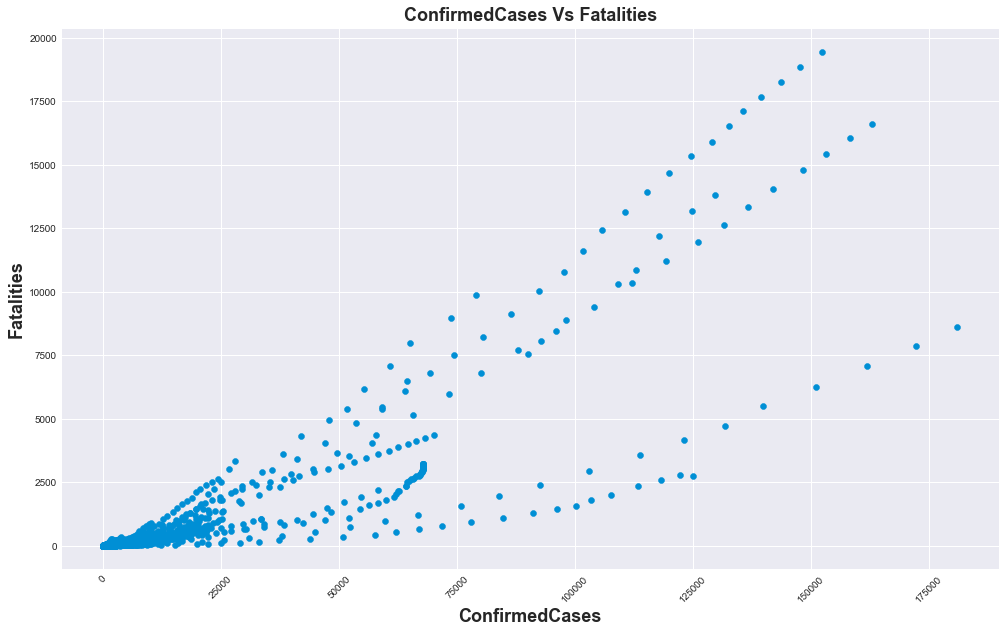

In [36]:
# Scatter plot between "ConfirmedCases" & "Fatalities"
plt.figure(figsize=(15,10))
plt.scatter(train['ConfirmedCases'], train['Fatalities'])

plt.xlabel('ConfirmedCases', fontsize=18, fontweight='bold')
plt.ylabel('Fatalities', fontsize=18, fontweight='bold')

plt.title('ConfirmedCases Vs Fatalities', fontsize=18, fontweight='bold')
plt.xticks(rotation = 45)

plt.show()

- By **Scatter Plots** can find **Outliers** and **relation between features**

In [40]:
df_Cases = Country[Country['ConfirmedCases'] != 0].sort_values(by='ConfirmedCases',ascending=False).head(10)

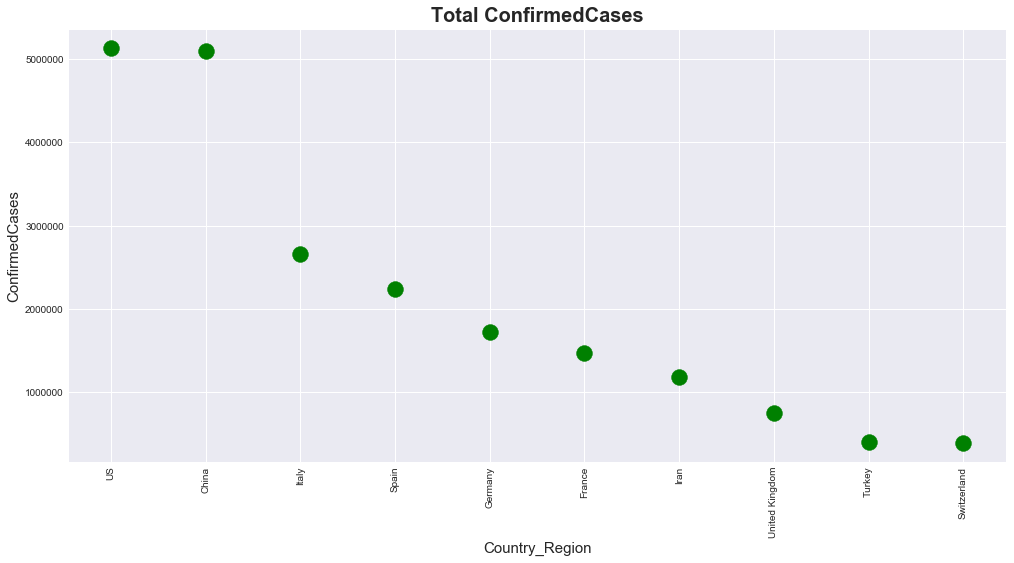

In [87]:
# Scatter Plot For Country VS ConfirmedCases
plt.figure(figsize=(15,8))
plt.scatter(df_Cases['Country_Region'], df_Cases['ConfirmedCases'], c='green', s=250)

plt.xlabel('Country_Region', fontsize = 15)
plt.ylabel('ConfirmedCases', fontsize = 15)

plt.title("Total ConfirmedCases", fontsize = 20, fontweight='bold')

plt.xticks(rotation=90)

plt.show()

- Highest & Lowest Number of ConfirmedCases in US & Switzerland

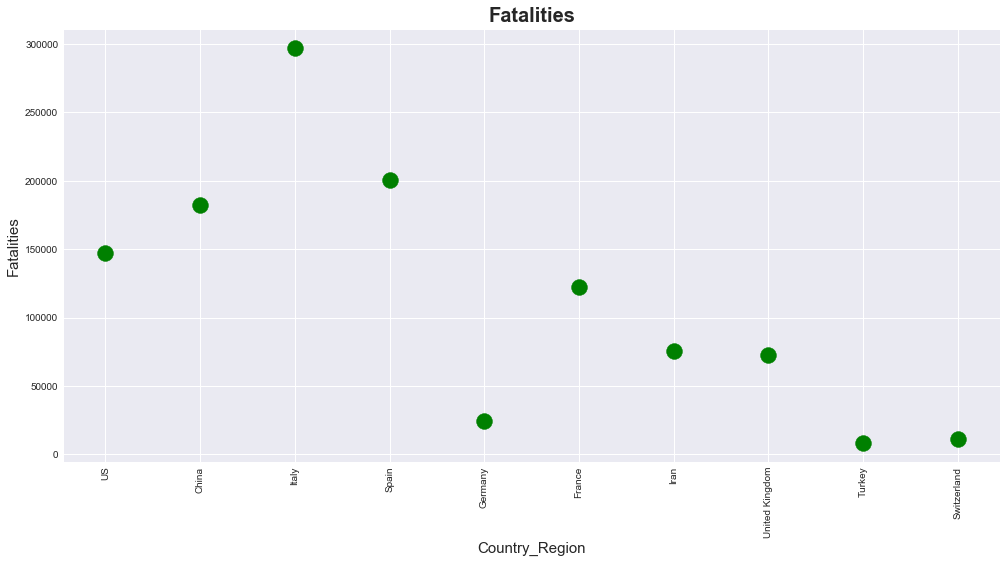

In [88]:
# Scatter Plot For Country VS ConfirmedCases
plt.figure(figsize=(15,8))
plt.scatter(df_Cases['Country_Region'], df_Cases['Fatalities'], c='green', s=250)

plt.xlabel('Country_Region', fontsize = 15)
plt.ylabel('Fatalities', fontsize = 15)

plt.title("Fatalities", fontsize = 20, fontweight='bold')

plt.xticks(rotation=90)

plt.show()

- Highest & Lowest Number of Fatalities in Italy & Turkey

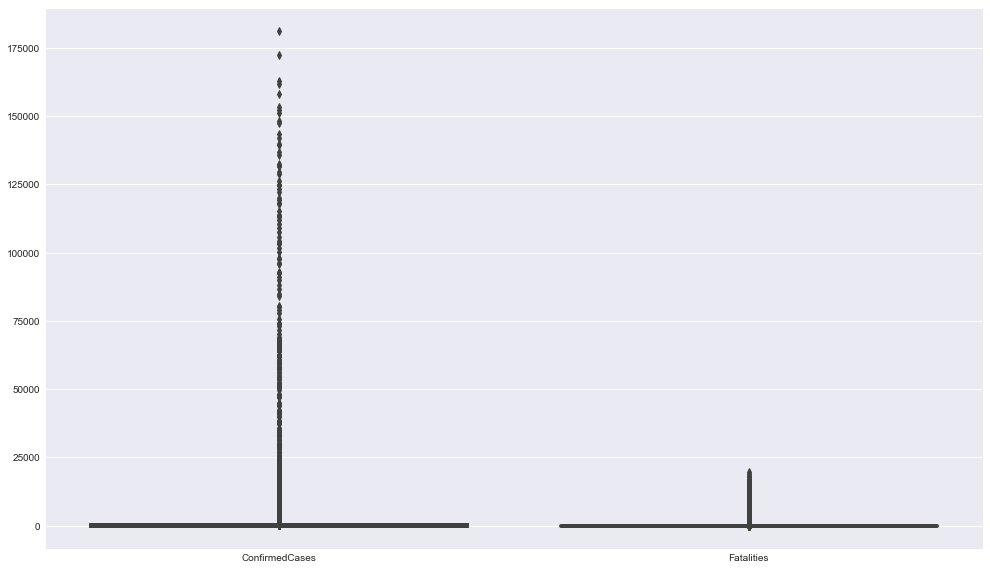

In [37]:
# Box plot created for feature columns of "ConfirmedCases" & "Fatalities"
plt.figure(figsize=(15,10))
sns.boxplot(data=train[['ConfirmedCases','Fatalities']])

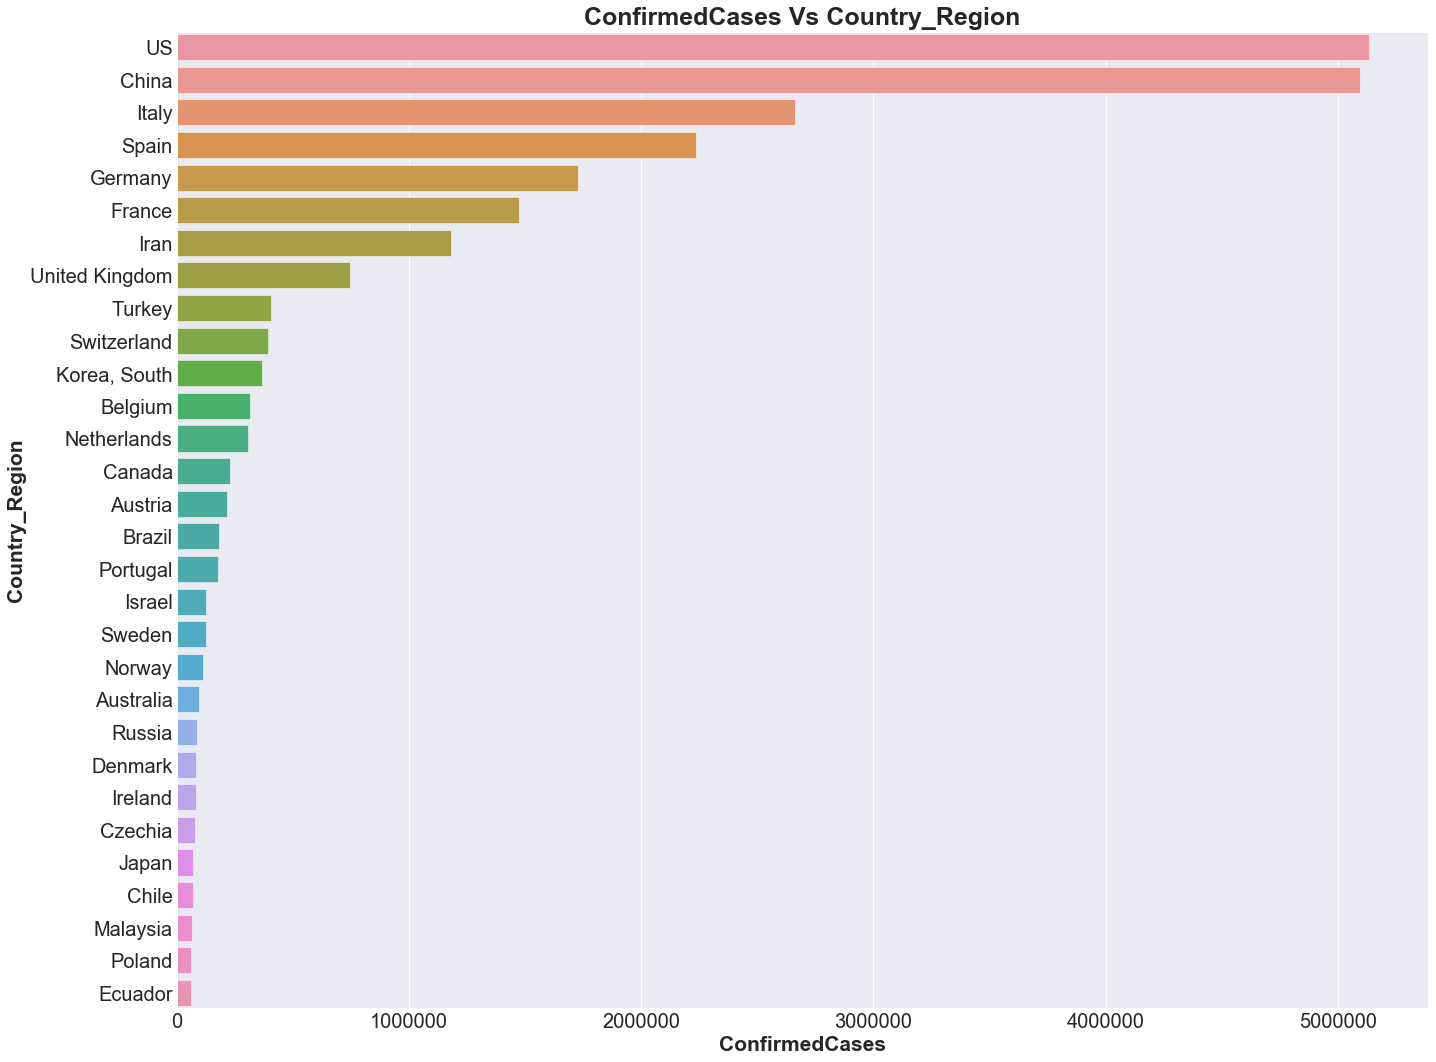

In [38]:
# bar plot showing Confirmed Cases as per Country / Region wise
plt.figure(figsize=(20,18))
Country = train.groupby(by='Country_Region')[['ConfirmedCases','Fatalities']].sum().reset_index()

sns.barplot(x='ConfirmedCases', y='Country_Region', data = Country[Country['ConfirmedCases'] != 0].sort_values(by='ConfirmedCases',ascending=False).head(30))

plt.xlabel('ConfirmedCases', fontsize=21, fontweight = 'bold')
plt.ylabel('Country_Region', fontsize=21, fontweight = 'bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('ConfirmedCases Vs Country_Region', fontsize=25, fontweight = 'bold')

plt.show()

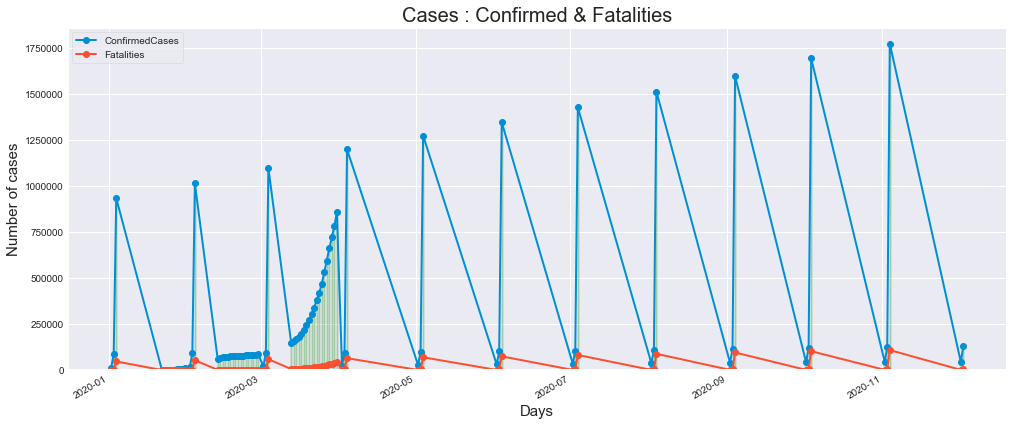

In [39]:
# Group dataset by 'Date' with sum parameter and analyse the 'Confirmed','Deaths' values.
#plt.figure(figsize=(15,12))
Date = train.groupby('Date').sum()[['ConfirmedCases', 'Fatalities']]
Date.plot(kind='line', figsize = (15,7), marker='o', linewidth=2)
plt.bar(Date.index, Date['ConfirmedCases'], alpha=0.3, color='g')

plt.xlabel('Days', fontsize=15)
plt.ylabel('Number of cases', fontsize=15)

plt.title('Cases : Confirmed & Fatalities', fontsize=20)

plt.legend()

plt.show()

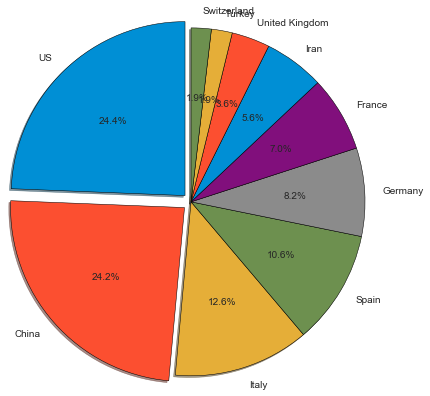

In [72]:
# Pie chart for Confirmed Cases

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# autopct : formatting how the percentages appear on the pie chart

plt.figure(figsize=(5,4))
explode =(0.1,0.1,0,0,0,0,0,0,0,0)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.pie(df_Cases['ConfirmedCases'], labels=df_Cases['Country_Region'], radius=2, autopct='%.1f%%',
        shadow=True, startangle=90, explode = explode, wedgeprops={'edgecolor': 'black'})



plt.show()

- Highest number of Confirmed Cases in US as 24.4%


- Lowest number of Confirmed Cases in Switzerland & Turkey as 1.9%

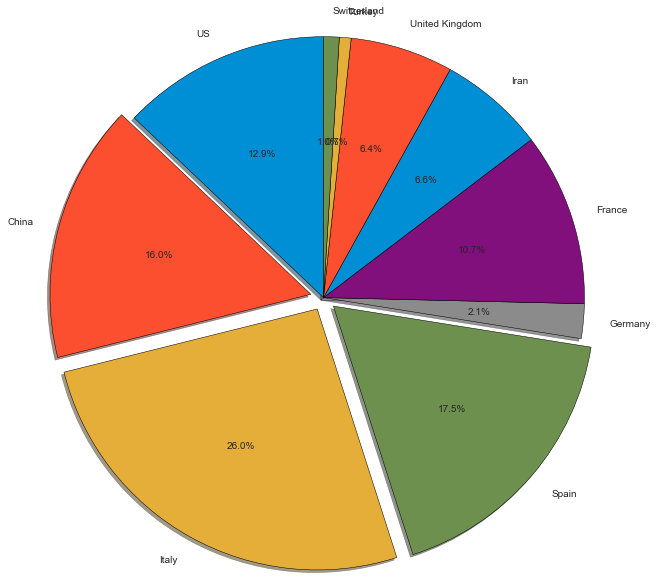

In [73]:
# Pie chart for Fatalities(Death)

plt.figure(figsize=(7,6))

plt.axis('equal')

explode =(0,0.1,0.1,0.1,0,0,0,0,0,0)

plt.pie(df_Cases['Fatalities'], labels=df_Cases['Country_Region'], radius=2, autopct='%0.1f%%',
        shadow=True, startangle=90, explode = explode, center=(0, 0), wedgeprops={'edgecolor': 'black'})

plt.show()

- Highest death rate in Italy : 26%


- Lowest death rate in Switzerland : 1%

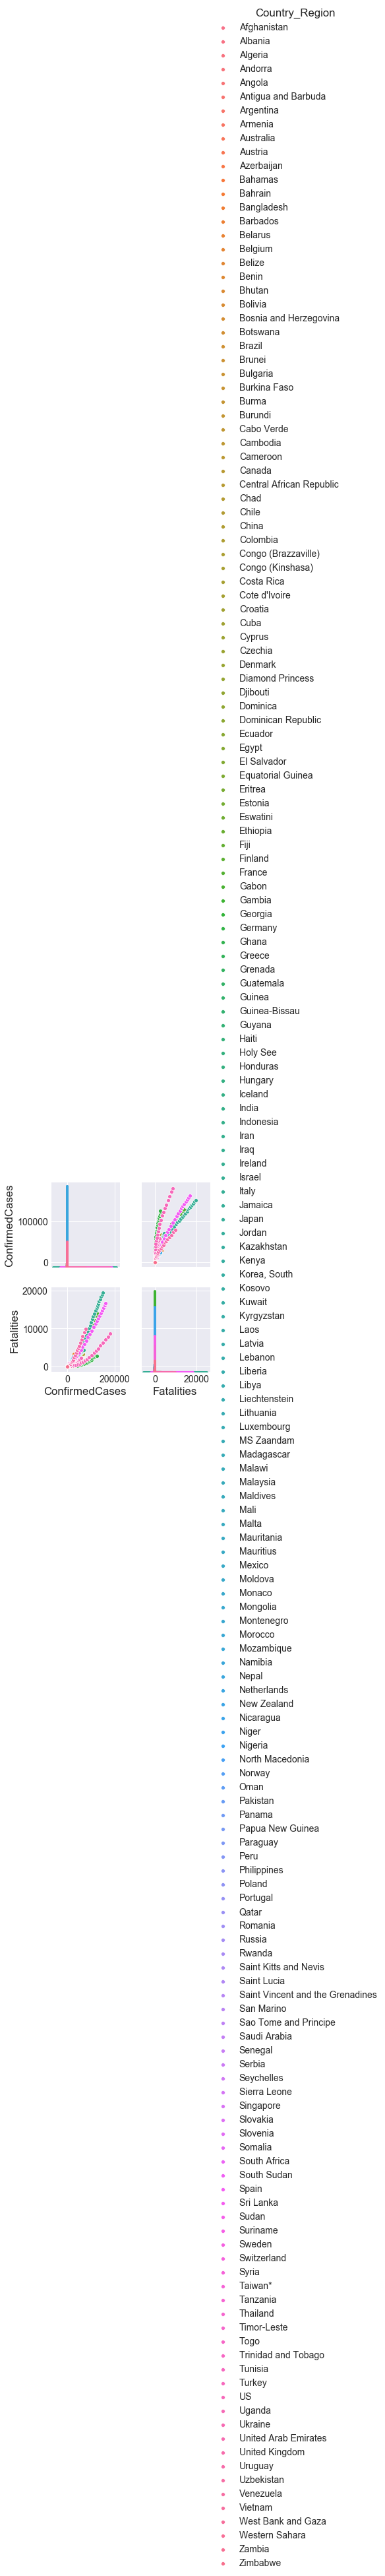

In [88]:
# Pairplot used to show features on Country/Region basis
df = train[['ConfirmedCases', 'Fatalities', 'Country_Region']]
sns.pairplot(df, hue='Country_Region')

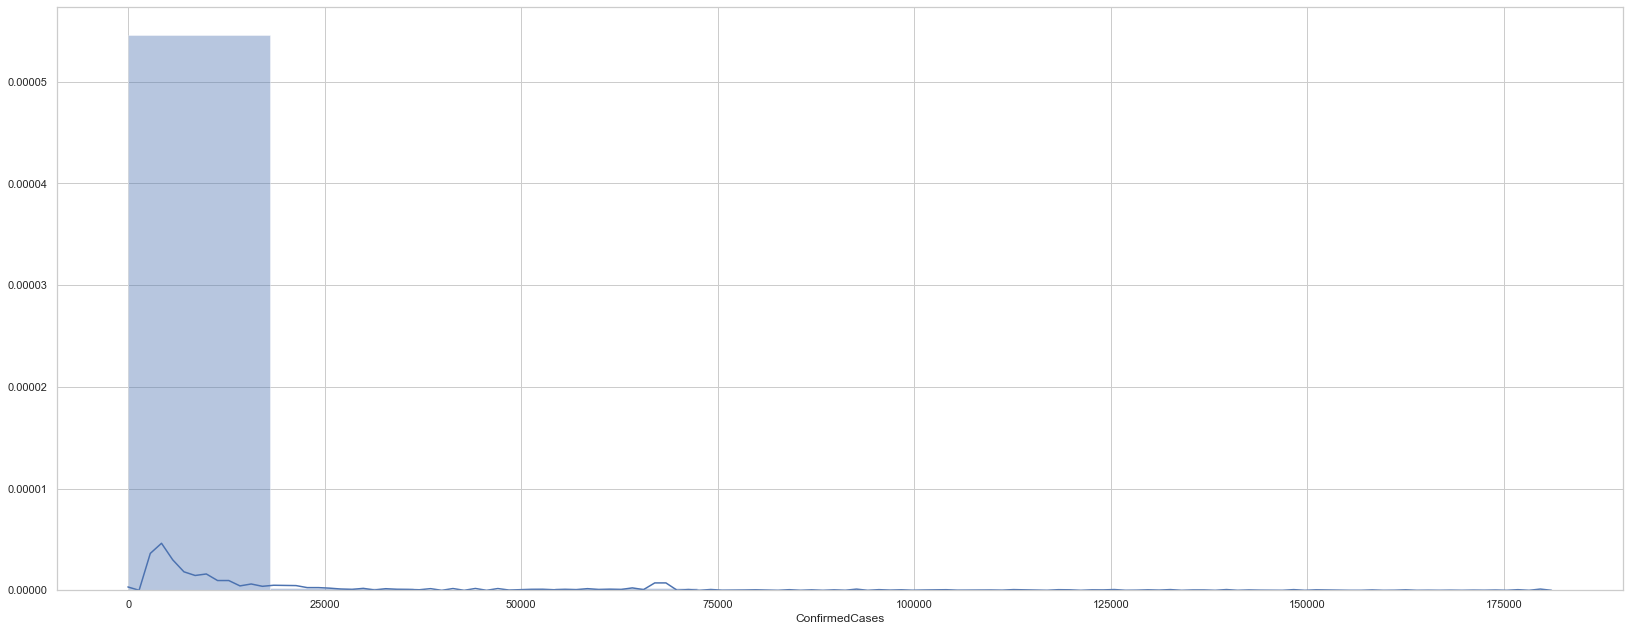

In [151]:
# Dist Plot
plt.figure(figsize=(25,10))
sns.distplot(train['ConfirmedCases'], bins=10)
plt.show()

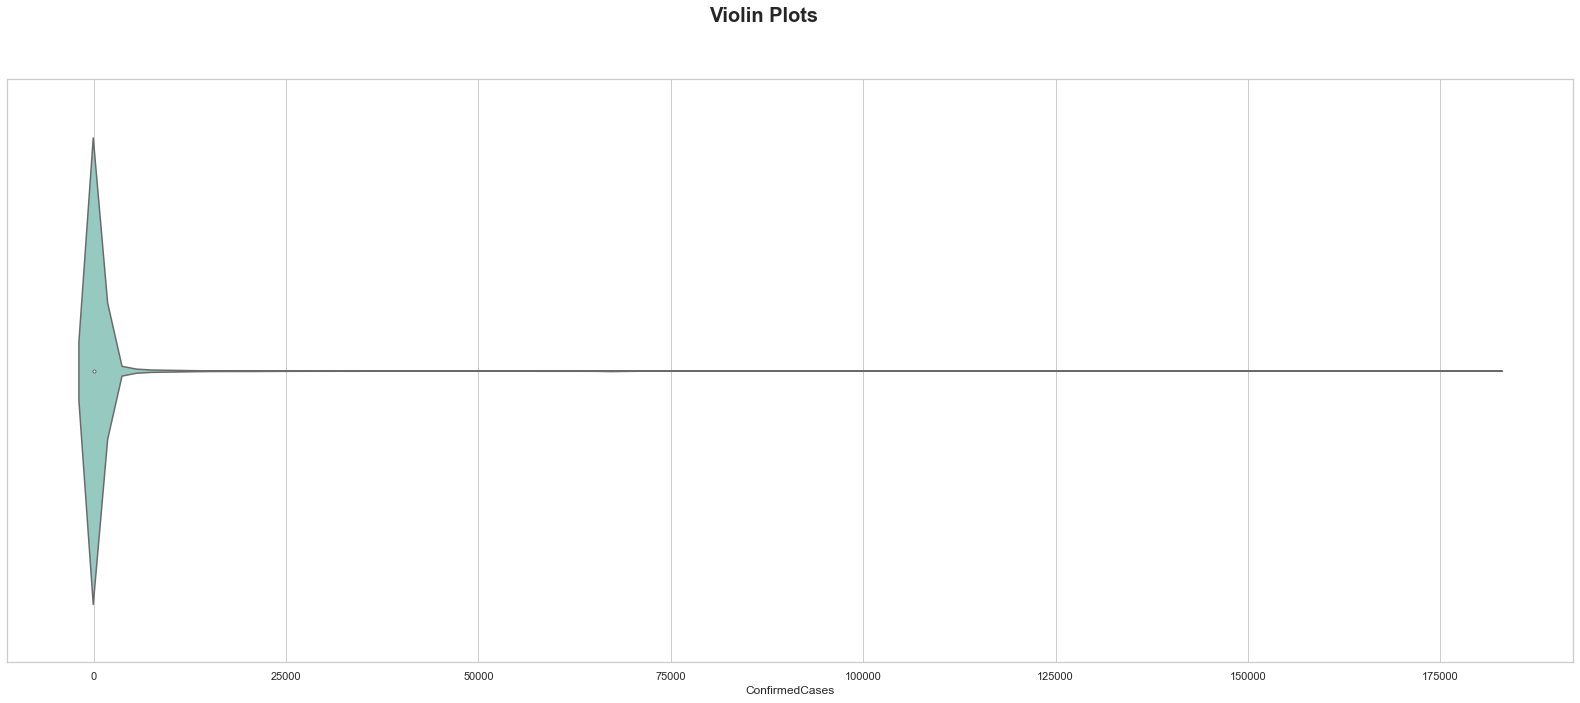

In [152]:
# Violin Plot
plt.figure(figsize=(25,10))
plt.suptitle('Violin Plots', fontsize=20, fontweight = 'bold')
sns.violinplot(x='ConfirmedCases', data=train, palette='Set3')
plt.show()